In [2]:
import emcee
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt
import initialization_data as init

In [3]:
d = init.get_distance()
time = init.get_time()
gamma = init.get_gamma()

mean = init.get_right_mean()
sigma = init.get_real_wide_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)

theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

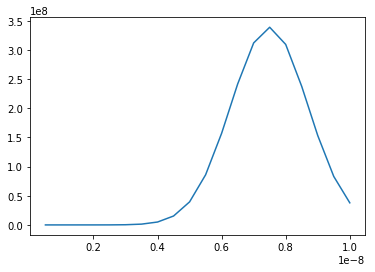

In [4]:
plt.plot(d, f)

In [5]:
theta_input = np.append(f, beta)

In [6]:
sim_data = dls.g2(theta_input, d, m, gamma, time)

In [7]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [8]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [9]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [10]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.342, 0.371, 0.377, 0.39 , 0.373, 0.377, 0.369, 0.387, 0.369,
       0.375, 0.376, 0.37 , 0.359, 0.387, 0.375, 0.362, 0.347, 0.413,
       0.391, 0.371, 0.347, 0.35 , 0.392, 0.396, 0.371, 0.417, 0.385,
       0.322, 0.387, 0.334, 0.385, 0.348, 0.355, 0.38 , 0.38 , 0.376,
       0.383, 0.374, 0.343, 0.365, 0.411, 0.364, 0.34 , 0.382, 0.392,
       0.36 , 0.391, 0.356, 0.388, 0.348, 0.369, 0.359, 0.361, 0.385,
       0.356, 0.372, 0.387, 0.389, 0.357, 0.372, 0.372, 0.357, 0.377,
       0.352, 0.379, 0.377, 0.35 , 0.403, 0.372, 0.396, 0.389, 0.356,
       0.382, 0.365, 0.399, 0.38 , 0.339, 0.377, 0.369, 0.352, 0.372,
       0.368, 0.376, 0.327, 0.368, 0.361, 0.371, 0.378, 0.378, 0.38 ,
       0.331, 0.353, 0.356, 0.368, 0.382, 0.383, 0.34 , 0.388, 0.387,
       0.38 ])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


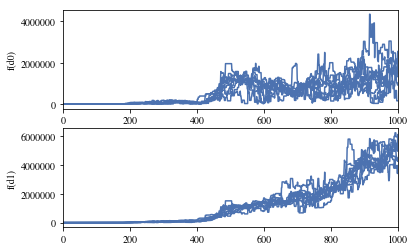

In [11]:
dls.view_burnin_plot(result, 0, 1)

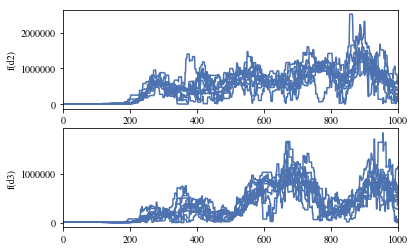

In [11]:
dls.view_burnin_plot(result, 2, 3)

In [12]:
chained_samples = dls.chain(result, 850, ndim)

In [13]:
samples_df = dls.create_dataframe(chained_samples, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,1.348979e+06,4.153623e+06,8.282454e+07,1.595270e+08,2.227987e+08,3.094732e+08,3.126798e+08,3.038233e+08,2.204262e+08,1.591384e+08,9.907689e+07,3.671248e+07,559239.107374,1.109808e+07,3.616641e+06,1.845751e+06,4.493049e+06,2.945428e+07,1.798296e+07,3.798594e+07


In [14]:
infer = np.zeros(20)
infer[0] = 3.875324e+06
infer[1] = 1.463547e+06
infer[2] = 824853.421342
infer[3] = 670539.447425
infer[4] = 4.779883e+06
infer[5] = 3.522233e+06
infer[6] = 5.050322e+06
infer[7] = 1.046527e+07
infer[8] = 4.611044e+06
infer[9] = 4.294199e+07
infer[10] = 8.349051e+07
infer[11] = 1.600455e+08
infer[12] = 2.401724e+08
infer[13] = 2.999977e+08
infer[14] = 3.482818e+08
infer[15] = 3.079806e+08
infer[16] = 2.369727e+08
infer[17] = 1.625614e+08
infer[18] = 8.685190e+07
infer[19] = 3.090790e+07


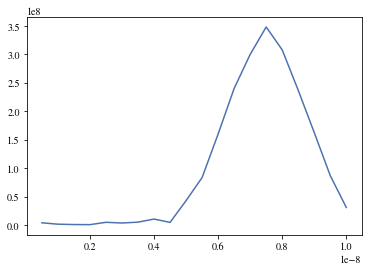

In [15]:
plt.plot(d, infer)

In [41]:
beta_df = dls.get_beta(chained_samples, ndim)
beta_infer = beta_df.quantile([0.5], axis=0)
beta_infer

,beta
0.5,0.854496


In [17]:
theta_infer = np.append(infer, beta_infer)

In [18]:
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

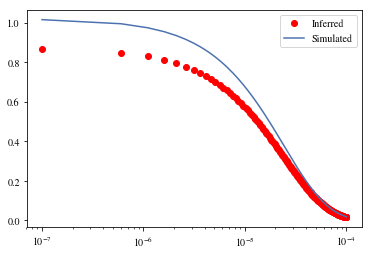

In [19]:
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

In [32]:
beta_posterior2 = dls.get_beta(chained_samples, ndim)

In [33]:
#beta_posterior = beta_posterior.values
beta_posterior2

,beta
0,0.239783
1,0.120791
2,0.120791
3,0.120791
4,0.120791
5,0.304430
6,0.304430
7,0.304430
8,0.304430
9,0.304430


In [34]:
beta_posterior3 = beta_posterior2.values
beta_posterior3

array([[0.23978339],
       [0.12079092],
       [0.12079092],
       ...,
       [0.78155361],
       [0.69716932],
       [0.68023862]])

In [36]:
beta_posterior4 = beta_posterior3.flatten()
beta_posterior4

array([0.23978339, 0.12079092, 0.12079092, ..., 0.78155361, 0.69716932,
       0.68023862])

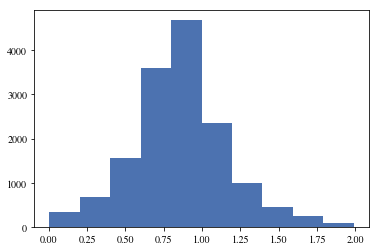

In [39]:
plt.hist(beta_posterior4)
plt.show()